In [1]:
from math import log, cosh

In [29]:
class FunctionError:

  def __init__(self, machine: list, answer: list):
    self.machine = machine
    self.answer = answer

  def er_mse(self) -> float:
    er_mse_output = 0
    for i in range(len(self.machine)):
      er_mse_output += (self.machine[i]
                        - self.answer[i])**2
    return er_mse_output/len(self.machine)

  def er_mae(self) -> float:
    er_mae_output = 0
    for i in range(len(self.machine)):
      er_mae_output += abs(self.machine[i]
                        - self.answer[i])
    return er_mae_output/len(self.machine)

  def er_accur(self) -> float:
    count = 0
    for i in range(len(self.machine)):
      if self.machine[i] == self.answer[i]:
        count += 1
    er_accur_output = count / len(self.machine)
    return er_accur_output

  def er_logcosh(self) -> float:
    er_logcosh_out = 0
    for i in range(len(self.machine)):
      er_logcosh_out += log(cosh(self.machine[i] - self.answer[i]))
    return er_logcosh_out

  def er_crosent(self) -> float:
    er_crosent_out = 0
    for i in range(len(self.machine)):
      er_crosent_out += (self.answer[i] * log(self.machine[i])
                         + (1 - self.answer[i]) * log(1 - self.machine[i]))
    return -er_crosent_out/len(self.machine)

  def er_f1(self) -> float:
    tp, fp, tn, fn = 0, 0, 0, 0
    for i in range(len(self.machine)):
      if self.machine[i] == self.answer[i]:
        if self.machine[i] == 1:
          tp += 1
        else:
          tn += 1
      else:
        if self.machine[i] == 1:
          fp += 1
        else:
          fn += 1
    pr = tp / (tp + fp)
    rec = tp / (tp + fn)
    print(tp, tn, fp, fn)
    er_fi_out = 2 * pr * rec /(pr + rec)
    return er_fi_out









In [3]:
m1 = [1, 0, 0, 1, 1, 1, 0]
a1 = [0, 0, 1, 1, 1, 0, 0]

In [10]:
m2 = [0.95, 0.85, 0.75, 0.65, 0.55, 0.45]
a2 = [1, 1, 1, 0, 0, 0]

In [13]:
m3 = [0.1, 0.2, 0.3, 0.4]
a3 = [0.15, 0.25, 0.35, 0.45]

In [23]:
m4 = [0, 1, 1, 1, 0, 0, 1, 0]
a4 = [0, 1, 0, 0, 1, 0, 0, 1]

In [8]:
machine1 = FunctionError(m1, a1)

In [11]:
machine2 = FunctionError(m2, a2)

In [14]:
machine3 = FunctionError(m3, a3)

In [30]:
machine4 = FunctionError(m4, a4)

MSE

In [32]:
machine3.er_mse()

0.0024999999999999988

MAE

In [33]:
machine3.er_mae()

0.04999999999999999

Accuracy

In [17]:
machine1.er_accur()

0.5714285714285714

Log-cosh loss

In [15]:
machine3.er_logcosh()

0.004997918054502509

Cross-entropy loss

In [12]:
machine2.er_crosent()

0.4912768529681961

F1-score

In [31]:
machine4.er_f1()

1 2 3 2


0.28571428571428575

Линейная регрессия

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [23]:
def func(x):
    return x ** 2

def gr_func(x):
    return 2 * x

In [26]:
eps = 0.0001

start = 4
learning_rate = 0.1
x = [start]
next_point = start

n = 100
for i in range(n):
    curr_point = next_point
    next_point = curr_point - learning_rate * gr_func(curr_point)
    x.append(next_point)
    print(f'Итерация: {i}')
    print(f'Значение: {next_point}')
    
    if abs(curr_point - next_point <= eps):
        break
    
    
    

Итерация: 0
Значение: 3.2
Итерация: 1
Значение: 2.56
Итерация: 2
Значение: 2.048
Итерация: 3
Значение: 1.6384
Итерация: 4
Значение: 1.31072
Итерация: 5
Значение: 1.0485760000000002
Итерация: 6
Значение: 0.8388608000000002
Итерация: 7
Значение: 0.6710886400000001
Итерация: 8
Значение: 0.5368709120000001
Итерация: 9
Значение: 0.4294967296000001
Итерация: 10
Значение: 0.3435973836800001
Итерация: 11
Значение: 0.27487790694400005
Итерация: 12
Значение: 0.21990232555520003
Итерация: 13
Значение: 0.17592186044416003
Итерация: 14
Значение: 0.140737488355328
Итерация: 15
Значение: 0.11258999068426241
Итерация: 16
Значение: 0.09007199254740993
Итерация: 17
Значение: 0.07205759403792794
Итерация: 18
Значение: 0.057646075230342354
Итерация: 19
Значение: 0.04611686018427388
Итерация: 20
Значение: 0.03689348814741911
Итерация: 21
Значение: 0.029514790517935284
Итерация: 22
Значение: 0.02361183241434823
Итерация: 23
Значение: 0.018889465931478583
Итерация: 24
Значение: 0.015111572745182867
Итерация:

Параметры модели: 
[[4.20607718]
 [2.98273036]]
Ошибка функции: 4962.564880791906


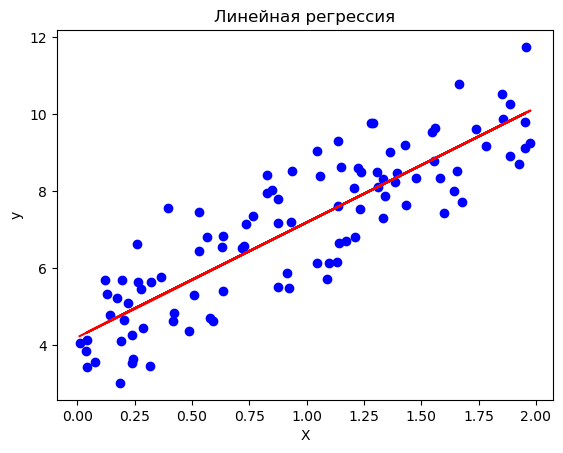

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Создание случайных данных
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Добавление единиц к данным (константа)
X_b = np.c_[np.ones((100, 1)), X]

# Инициализация параметров
theta = np.random.randn(2, 1)

# Функция затрат
def compute_cost(X, y, theta):
    m = len(y)
    cost = (1/2*m) * np.sum((X.dot(theta) - y)**2)
    return cost

# Градиентный спуск
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        theta = theta - learning_rate * gradients
        cost_history[i] = compute_cost(X, y, theta)
    
    return theta, cost_history

# Настройки градиентного спуска
learning_rate = 0.01
iterations = 1000

# Запуск градиентного спуска
theta, cost_history = gradient_descent(X_b, y, theta, learning_rate, iterations)

print(f"Параметры модели: \n{theta}")
print(f"Ошибка функции: {cost_history[-1]}")

# Визуализация
plt.scatter(X, y, color='blue')
plt.plot(X, X_b.dot(theta), color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Линейная регрессия')
plt.show()


Параметры модели: 
[[5.28158724]
 [5.70064162]
 [6.84954352]
 [8.05469942]]
Стоимость функции: 0.4183934148949182


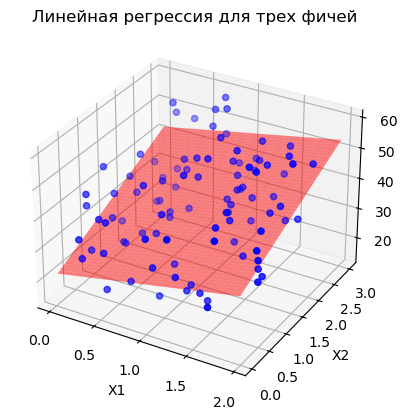

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Инициализация параметров
theta = np.random.randn(4, 1)

# Функция затрат
def compute_cost(X, y, theta):
    m = len(y)
    cost = (1/(2*m)) * np.sum((X.dot(theta) - y)**2)
    return cost

# Градиентный спуск
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        theta = theta - learning_rate * gradients
        cost_history[i] = compute_cost(X, y, theta)
    
    return theta, cost_history

# Настройки градиентного спуска
learning_rate = 0.01
iterations = 1000

# Запуск градиентного спуска
theta, cost_history = gradient_descent(X_b, y, theta, learning_rate, iterations)

print(f"Параметры модели: \n{theta}")
print(f"Стоимость функции: {cost_history[-1]}")

# Визуализация
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, y, color='blue')

# Создание сетки для поверхности
X1_surf, X2_surf = np.meshgrid(np.linspace(X1.min(), X1.max(), 100), 
                               np.linspace(X2.min(), X2.max(), 100))
X3_surf = np.mean(X3)  # Константное значение для X3
y_surf = theta[0] + theta[1] * X1_surf + theta[2] * X2_surf + theta[3] * X3_surf
ax.plot_surface(X1_surf, X2_surf, y_surf, color='red', alpha=0.5)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
plt.title('Линейная регрессия для трех фичей')
plt.show()
